In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
mul_index = pd.MultiIndex.from_tuples([('cust_1', '2020'), ('cust_1', '2021'),

   ('cust_2', '2020'), ('cust_2', '2021')])  



data = pd.DataFrame(data=np.arange(16).reshape(4, 4),

   index=mul_index,

   columns=['prd_1', 'prd_2', 'prd_3', 'prd_4'],

   dtype='int')

mul_index
data

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

In [16]:
dataStacked=data.stack()
dataStacked

cust_1  2020  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2021  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2020  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2021  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int32

In [17]:
dataStacked['cust_2']['2020'][['prd_1','prd_2']]

prd_1    8
prd_2    9
dtype: int32

In [18]:
data

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

In [19]:
data.ix['cust_2','prd_3']=np.nan
data

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1    2.0      3
       2021      4      5    6.0      7
cust_2 2020      8      9    NaN     11
       2021     12     13    NaN     15

In [21]:
data.stack(dropna=True)#defalut
data.stack(dropna=False)

cust_1  2020  prd_1     0.0
              prd_2     1.0
              prd_3     2.0
              prd_4     3.0
        2021  prd_1     4.0
              prd_2     5.0
              prd_3     6.0
              prd_4     7.0
cust_2  2020  prd_1     8.0
              prd_2     9.0
              prd_3     NaN
              prd_4    11.0
        2021  prd_1    12.0
              prd_2    13.0
              prd_3     NaN
              prd_4    15.0
dtype: float64

In [23]:
dataStacked.unstack()

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

In [24]:
dataStacked.unstack(level=0)

cust_1  cust_2
2020 prd_1       0       8
     prd_2       1       9
     prd_3       2      10
     prd_4       3      11
2021 prd_1       4      12
     prd_2       5      13
     prd_3       6      14
     prd_4       7      15

In [25]:
dataStacked.unstack(level=1)

2020  2021
cust_1 prd_1     0     4
       prd_2     1     5
       prd_3     2     6
       prd_4     3     7
cust_2 prd_1     8    12
       prd_2     9    13
       prd_3    10    14
       prd_4    11    15

In [26]:
dataStacked.unstack(level=2)

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

In [27]:
dataStacked.unstack(level=-2)

2020  2021
cust_1 prd_1     0     4
       prd_2     1     5
       prd_3     2     6
       prd_4     3     7
cust_2 prd_1     8    12
       prd_2     9    13
       prd_3    10    14
       prd_4    11    15

In [ ]:
"""
pivot, pivot_table
melt
stack,unstack
wide_to_long
"""

In [33]:
data_wide = pd.DataFrame({"C1prd1" : {0 : "a", 1 : "b", 2 : "c"},

   "C1prd2" : {0 : "d", 1 : "e", 2 : "f"},

   "C2prd1" : {0 : 2.5, 1 : 1.2, 2 : .7},

   "C2prd2" : {0 : 3.2, 1 : 1.3, 2 : .1},

   "value" : dict(zip(range(3), np.random.randn(3)))

   })
data_wide

,C1prd1,C1prd2,C2prd1,C2prd2,value
0,a,d,2.5,3.2,1.983649
1,b,e,1.2,1.3,1.186313
2,c,f,0.7,0.1,-0.166179


In [32]:
for i,x in zip(range(3), np.random.randn(3)):
    print(i,x)

0 0.6818344420349347
1 -1.7825206140801604
2 0.46556434010505676


In [45]:
data_wide = pd.DataFrame({"C1prd1" : {0 : "a", 1 : "b", 2 : "c"},

   "C1prd2" : {0 : "d", 1 : "e", 2 : "f"},

   "C2prd1" : {0 : 2.5, 1 : 1.2, 2 : .7},

   "C2prd2" : {0 : 3.2, 1 : 1.3, 2 : .1},

   "value" : dict(zip(range(3), np.random.randn(3)))

   })
data_wide
data_wide["seq_no"]=data_wide.index
data_wide
pd.wide_to_long(data_wide,["C1","C2"],i="seq_no",j="prd",suffix="\w+")

,,value,C1,C2
seq_no,prd,,,
0,prd1,-0.156182,a,2.5
1,prd1,-0.097976,b,1.2
2,prd1,-0.076577,c,0.7
0,prd2,-0.156182,d,3.2
1,prd2,-0.097976,e,1.3
2,prd2,-0.076577,f,0.1


In [48]:
data=pd.DataFrame({
    'id':['id1','id1','id1','id2','id2','id3'],
    'f1':['a','a','a','b','b','b'],
    'f2':['d','d','d','c','c','d']
})
data

,id,f1,f2
0,id1,a,d
1,id1,a,d
2,id1,a,d
3,id2,b,c
4,id2,b,c
5,id3,b,d


In [49]:
pd.crosstab(data.f1, data.f2)
#           (인덱스, 컬럼)

f2,c,d
f1,,
a,0,3
b,2,1


In [ ]:
#아나콘다 실행창 -> pip install plotnine

In [51]:
train=pd.read_csv("train.csv")
train.describe() #기술통계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
#성별에 따른 생존률
train.groupby('Sex')[['Survived']].mean()#대괄호 1개 시리즈 2개 데이터 프레임
#groupby(그룹화 기준 컬럼)[열].함수()

#pivot_table 함수로 동일한 결과
#pd.pivot_table(데이터, index= , columns=, values, aggfund)
pd.pivot_table(train,index='Sex',values='Survived',aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [73]:
train.pivot_table(train,index=['Sex'])
#describe
#성별로 구분(groupby), 생존여부(Survived) 컬럼에 대해
#describe 함수 적용
train.groupby("Sex")[['Survived']].mean()
#성별, 선실등급별 생존률
train.pivot_table(index=["Sex","Pclass"],values="Survived", aggfunc=np.mean)
train.pivot_table("Survived",index=["Sex","Pclass"], aggfunc=np.mean)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [81]:
train.info()
train['Survived_2']=(train.Sex=="female")&(train.Age>0)&(train.Embarked)
train.isnull().sum()
train['Survived_2'].value_counts()
train['Survived_2']=train['Survived_2'].astype(int)
train['Survived_2']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived2      891 non-null bool
Survived_2     891 non-null bool
dtypes: bool(2), float64(2), int64(5), object(5)
memory usage: 85.4+ KB


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    0
890    0
Name: Survived_2, Length: 891, dtype: int32

In [2]:
from plotnine import *
# plotnine : R ggplot2 R언어의 시각화 도구 -> 파이썬에서 사용가능

In [3]:
#pip install missingno
import missingno as msno
#missingno:누락값 시각화 패키지

In [84]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived2',
       'Survived_2'],
      dtype='object')

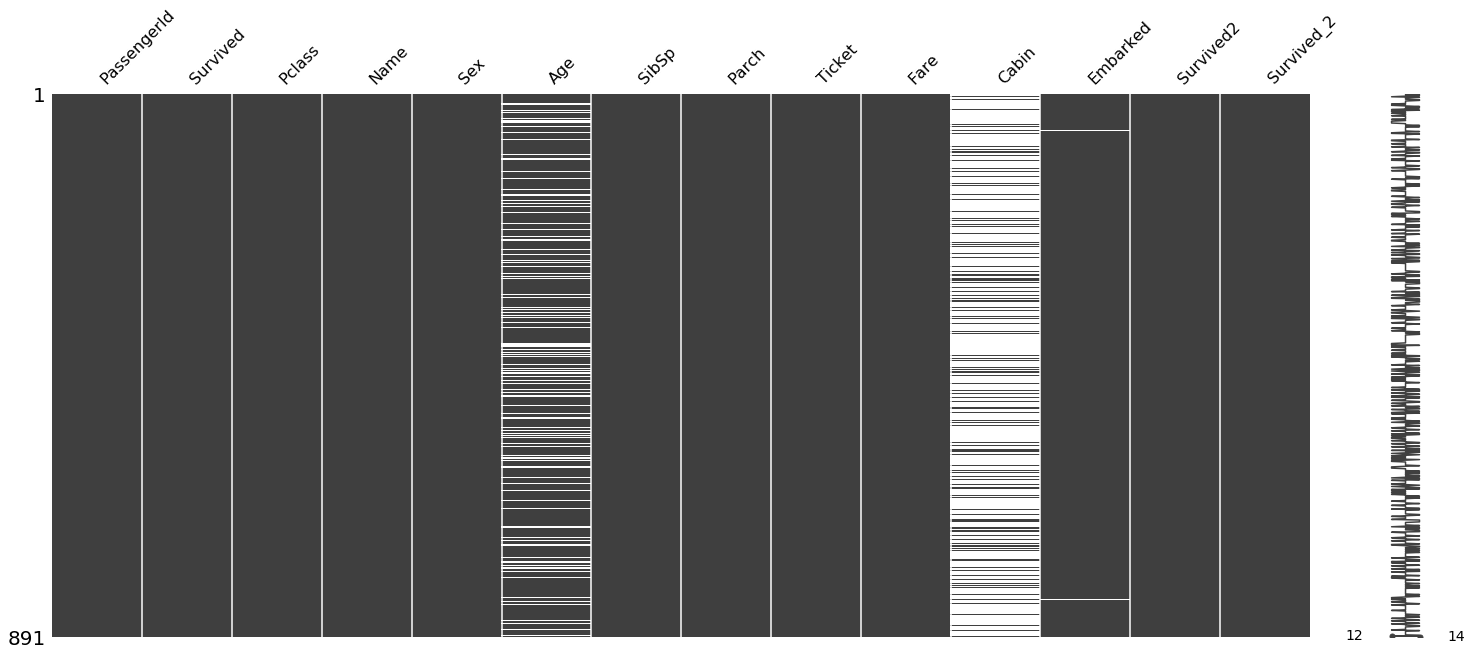

In [85]:
msno.matrix(train)

In [ ]:
# import matplotlib
# from matplotlib import font_manager, rc
# import platform
# if platform.system()=="Windows":
#     font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#     rc('font', family=font_name)
# matplotlib.rcParams['axes.unicode_minus']=False

# import warnings
# warnings.filterwarnings("ignore")

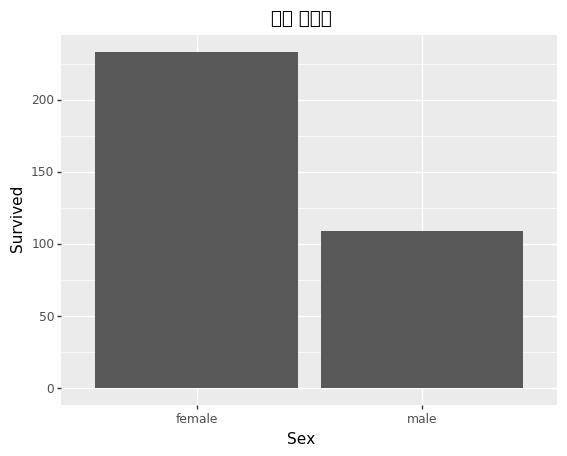

<ggplot: (-9223371864640073620)>

In [89]:
(ggplot(train)
+ aes(x='Sex', y='Survived')
+ geom_col()
+ ggtitle("성별 생존률")
+ 
)

In [76]:
#타이타닉 데이터 분석#
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.shape
test.shape
test.head()
train.head()
test.describe()
train.describe()
# train.info()
test.info()
#전처리 train과 테스트 동일하게 nan에 대해서도 처리
#파생변수 : 이미 존재하는 변수로부터 유도 되어 만들어지는 변수
#train과 test 파생변수도 똑같이


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [79]:
test['Survived']=(test.Sex=="female")# & (test.Embarked) & (test.Age>0)
test.head()
test.isnull().sum()
test['Survived'].value_counts()

False    266
True     152
Name: Survived, dtype: int64

In [80]:
submission=test[['PassengerId','Survived']]
submission.head()
submission['Survived']=submission['Survived'].astype(int)
submission.head()
submission.to_csv("submission.csv",index=False)

In [ ]:
#범주형데이터->원핫인코딩
#혈액형:A, B, A, AB, O, O
# A:1000
# B:0100
# AB:0010
# O:0001

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
obj_df=train.select_dtypes(include='object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [132]:
#단 하나의 열이라도 na있으면, 행 전체 추출
# obj_df['Cabin'].value.counts
# train
train['Embarked']
train['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [142]:
train.loc[train['Sex']=="male",'Sex']=0
train.loc[train['Sex']=="female",'Sex']=1

test.loc[test['Sex']=="male",'Sex']=0
test.loc[test['Sex']=="female",'Sex']=1

In [143]:
test['Sex']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

In [26]:
#sklearn 의 label 인코더
from sklearn.preprocessing import LabelEncoder

In [31]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [32]:
trainCopy=train.copy()
testCopy=test.copy()

In [33]:
#1
# le=LabelEncoder()
# le.fit(["male","female"])

# train['Sex']=le.transform(train['Sex'])
# test['Sex']=le.transform(test['Sex'])

#2
def genToInt(data):
    le=LabelEncoder()
    le.fit(["male","female"])
    data['Sex']=le.transform(data['Sex'])
    return data
trainCopy=genToInt(trainCopy)
testCopy=genToInt(testCopy)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Sex(남/여), Pclass(1/2/3), Embarked(C/Q/S)
# 10, 100,
# 01, 010,
#   , 001
dummy_columns=["Sex","Pclass", "Embarked"]
def myDummy(data, columns):
    for column in columns:
#         print(pd.get_dummies(data[column],prefix=column))
        data=pd.concat([data,pd.get_dummies(data[column],prefix=column)],axis=1)
        data.drop(column, axis=1)
    return data
    #data에 모든 열 추가
    
    #각각의 컬럼값을 원핫인코딩->리턴
#Sex0 Sex1  Pclass1 Pclass2 Pclass3 Embarked_Q
# 1    0       0         1      0
trainDummy=myDummy(train, dummy_columns)
testDummy=myDummy(test, dummy_columns)
print("원한 인코딩 이전")
print(train.shape)
print(test.shape)
print("원핫 인코딩 이후")
print(trainDummy.shape)
print(testDummy.shape)
testDummy

원한 인코딩 이전
(891, 12)
(418, 11)
원핫 인코딩 이후
(891, 20)
(418, 19)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1,0,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,1,0,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,1,0,0,1,0,0,1


In [ ]:
모델=가중치1

In [34]:
trainDummy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,1,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,1,0,0,1,0,0


In [40]:
#승객 id, 이름, 티켓, 캐빈 제거 
trainX=trainDummy.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)
trainX.info()
testX=testDummy.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)
testX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null object
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      889 non-null object
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), object(2), uint8(8)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
Pclass        418 non-null int64
Sex           418 non-null object
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          4

In [ ]:
"""
목표 : 등수 올리기 
-조건문 개선 하여 최소 100등 더 올려보자!!
-Name => 기반으로 Age결측값 처리
Mrs => Mrs 그룹 중앙값
Miss => Miss 그룹 중앙값
Mr
나머지는 전체 그룹 평균 or 중앙값으로 median
-FamilySize 컬럼 추가(SibSp+Parch), binning(소가족 중가족 대가족)S/M/L
"""

In [73]:
train=pd.read_csv("train.csv")
train['gmr']=train['Name'].str.extract(" ([a-zA-Z]+)\.")
train=train.drop(["PassengerId",'Ticket'],axis=1)
train['FamilySize']=train['SibSp']+train['Parch']
#FamilySize max=10
#0~3 s, 4~5 m,6~10 l
bins=[0,3,5,10]
labels=['S_소가족','M_중가족','L_대가족']
train["SML"]=pd.cut(train.FamilySize,bins,labels=labels)
train[["Survived","gmr","Age","SibSp","Parch","FamilySize"]]
listA=['Mr','Miss','Mrs']
for i in listA:
    filln=train[train.gmr==i]['Age'].mean()
    print(filln)
# train.head(50)
#train.isnull().sum()

32.368090452261306
21.773972602739725
35.898148148148145


In [ ]:
train

In [74]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
test['Survived']=(test.Sex=="female")# & (test.Embarked) & (test.Age>0)
test['gmr']=test['Name'].str.extract(" ([a-zA-Z]+)\.")
test=test.drop(["PassengerId",'Ticket'],axis=1)
test
# test['Survived'].value_counts()
# test.isnull().sum()


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,gmr
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,False,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,True,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,False,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,False,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,True,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S,False,Mr
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C,True,Dona
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S,False,Mr
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S,False,Mr


In [75]:
submission=test[['PassengerId','Survived']]
submission.head()
submission['Survived']=submission['Survived'].astype(int)
submission.head()
submission.to_csv("submission.csv",index=False)

KeyError: "['PassengerId'] not in index"